In [41]:
from datascience import *
import numpy as np

In [42]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In this lecture, I am going to use more interactive plots (they look better) so I am using the plotly.express library.  We won't test you on this but it's good to know.

In [43]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Lecture 11

In this lecture, we derive the equation for linear regression using the correlation coefficient $r$.

## Recap From Last Lecture

In the previous lecture, we introduced the correlation coefficient: 

\begin{align}
r 
& = \text{Mean}\left(\text{StandardUnits}(x) *  \text{StandardUnits}(y)\right)\\
& = \frac{1}{n} \sum_{i=1}^n \text{StandardUnits}(x_i) *  \text{StandardUnits}(y_i)\\
& = \frac{1}{n}\sum_{i=1}^n \left( \frac{x_i - \text{Mean}(x)}{\text{Stdev}(x)} \right) * \left( \frac{y_i - \text{Mean}(y)}{\text{Stdev}(y)} \right) \\
\end{align}

We implemented the correlation coefficient:

In [44]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [45]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_su = standard_units(t.column(x))
    y_in_su = standard_units(t.column(y))
    return np.mean(x_in_su * y_in_su)

We built an intuition about the correlation coefficient using the following code which you don't need to understand:

In [46]:
def make_correlated_data(r, n=500):
    "Generate a a table with columns x and y with a correlation of approximately r"
    x = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n)
    y = r*x + (np.sqrt(1-r**2))*z
    return Table().with_columns("x", x, "y", y)

def r_scatter(r, n=500, ax=None):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n)
    y = r*x + (np.sqrt(1-r**2))*z
    if ax:        
        ax.scatter(x, y, color='darkblue', s=20)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4) 
    else:
        plots.scatter(x, y, color='darkblue', s=20)
        plots.xlim(-4, 4)
        plots.ylim(-4, 4)    

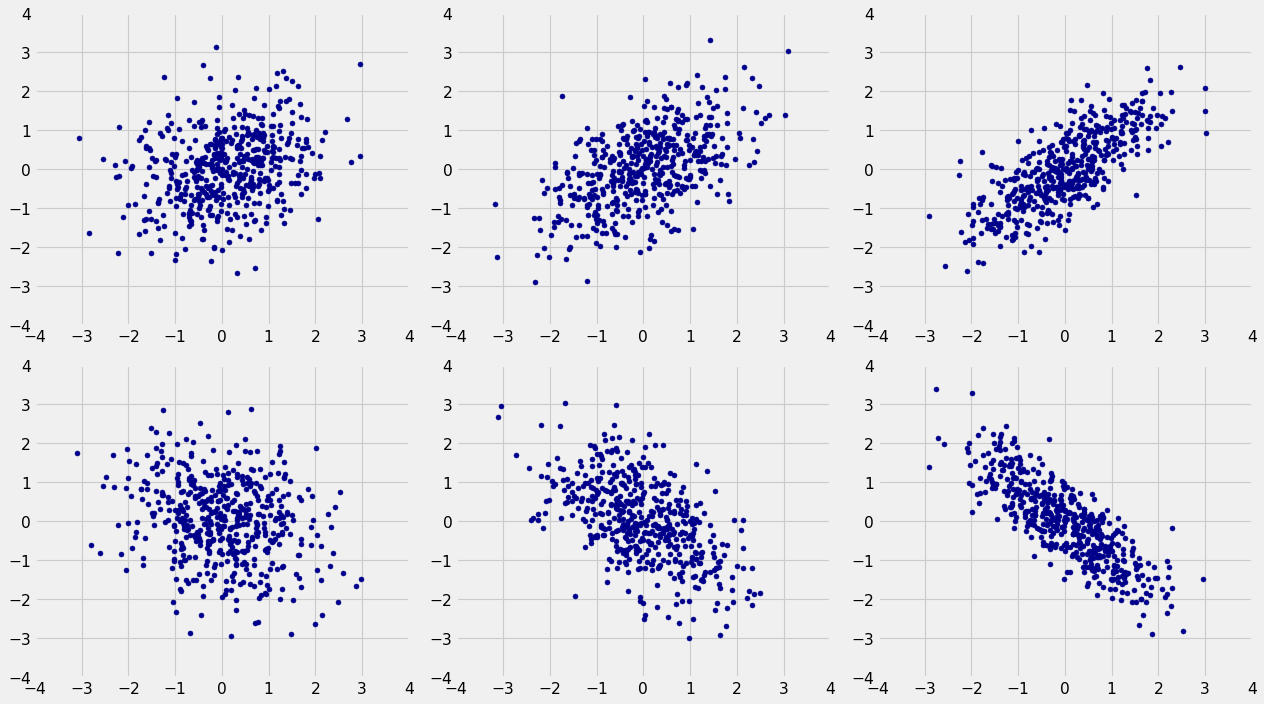

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [47]:
fig, ax = plots.subplots(2, 3, dpi=80, figsize=(16,9))
n = 500
r_scatter(0.2, n, ax[0,0])
r_scatter(0.5, n, ax[0,1])
r_scatter(0.8, n, ax[0,2])
r_scatter(-0.2, n, ax[1,0])
r_scatter(-0.5, n, ax[1,1])
r_scatter(-0.8, n, ax[1,2])
fig.tight_layout(pad=1)

---
<center>Return to Slides</center>

---


## Care when Interpreting the Correlation

When computing correlation it is important to always visualize your data first and then consider each of the following issues.


### Correlation does Not Imply Causation

We have covered this one extensively at this point.  

### Nonlinearity

Low correlation does not imply absence of a relationship. Correlation measures linear relationships.  Data with strong non-linear relationship may have very low correlation.  

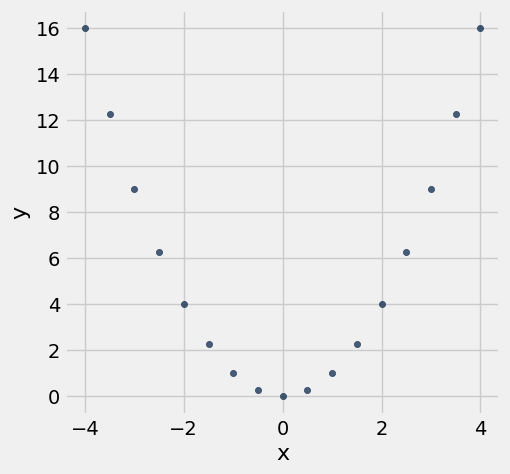

In [48]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y')

There is clearly a relationship to this data.  Given the value of $x$ you can easily predict the value of $y$.  What is the correlation?

In [49]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers

Outliers can have a significant effect on correlation.  

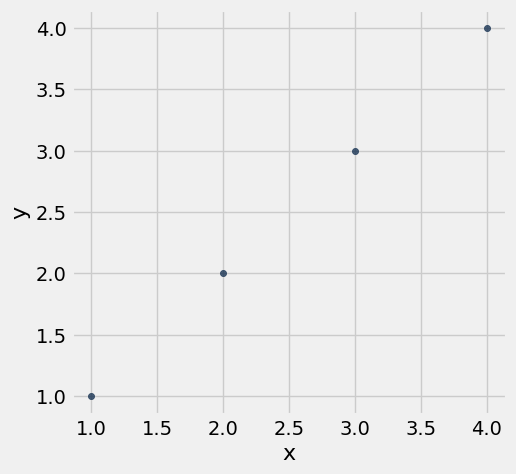

In [50]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y')

In [51]:
correlation(line, 'x', 'y')

1.0

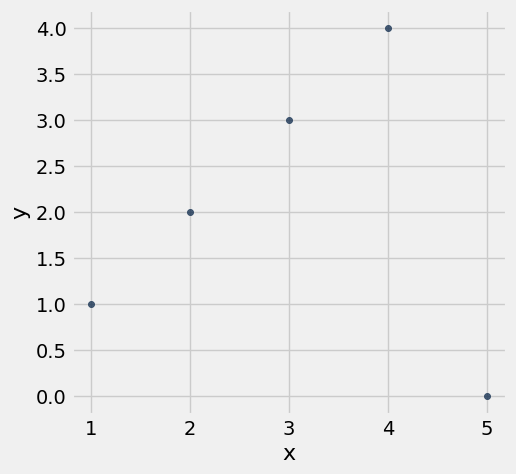

In [52]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y')

In [53]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations

The correlation between aggregated variables (e.g., after grouping) may be much higher than the correlation between the underlying variables.

In [54]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


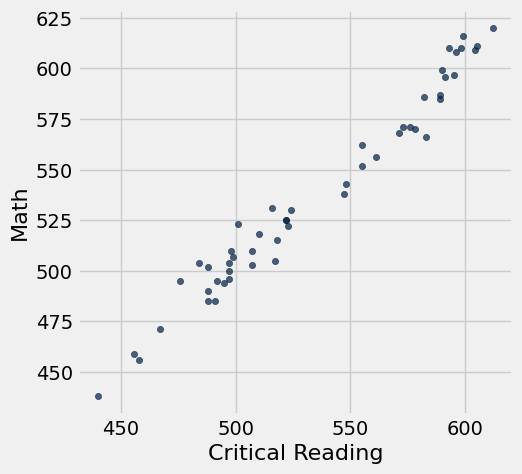

In [55]:
sat2014.scatter('Critical Reading', 'Math')

In [56]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341

That is a very strong correlation.  However, each data point corresponds to a large cloud of data points where each person might have had greater variability in their scores.  

### Bonus: Understanding the SAT data
While we have the data loaded.  Does anyone have a guess which dots correspond to which state?

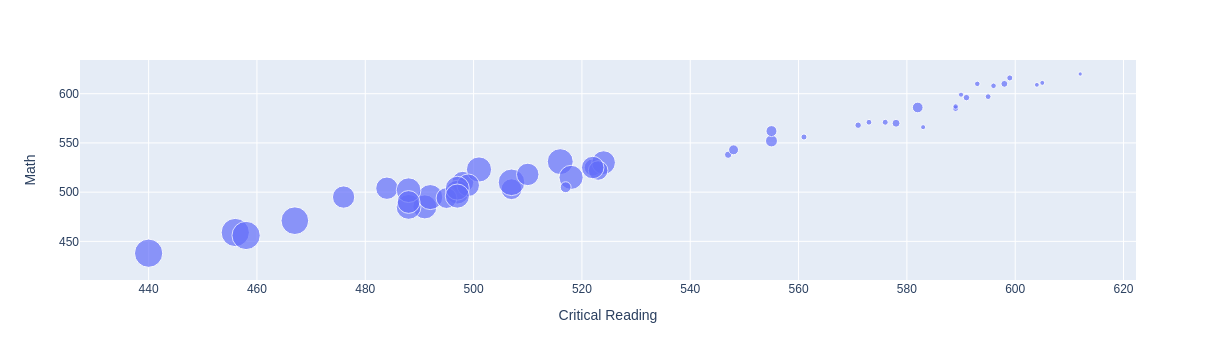

In [57]:
px.scatter(sat2014.to_df(), 
           x = "Critical Reading",
           y = "Math",
           hover_name = "State",
           size = "Participation Rate")

---
<center>Return to Slides</center>

---

## Prediction Lines

Here we build an intuition about the relationship between the slope of the nearest neighbor line and the correlation coefficient.

## The Relationship Between Correlation and NN Predictions

Here we examine the relationship between the nearest neighbor prediction "line" and the correlation for several synthetic datasets.


In [142]:
def make_nn_predictions(table, x, y, window):
    
    def nn_prediction(x_val):        
        neighbors = table.where(x, are.between(x_val - window, x_val + window)).column(y)
        if len(neighbors) == 0:
            return np.nan
        else: 
            return np.mean(neighbors)   
        
    return table.apply(nn_prediction, x)

In [183]:
def draw_line(intercept=0, slope=1):
    plots.axline(xy1=(0, intercept), slope=slope)    

def draw_vline(x_pos):
    plots.axvline(x_pos, color='black')

**Todo**
- use `make_correlated_data` to create a table with data with r=0.99
- plot the data
- compute the nn_predictions and add the nn predictions as a column
- plot the nn predictions
- add a line with a slope of 1 

Now change r to lower values (e.g. 0.5). What is happening?
- draw a vertical line at x=2

In [180]:
r = 0.9
example = make_correlated_data(r)
predictions = make_nn_predictions(example, 'x', 'y', 0.25)
example = example.with_column('predictions', predictions)

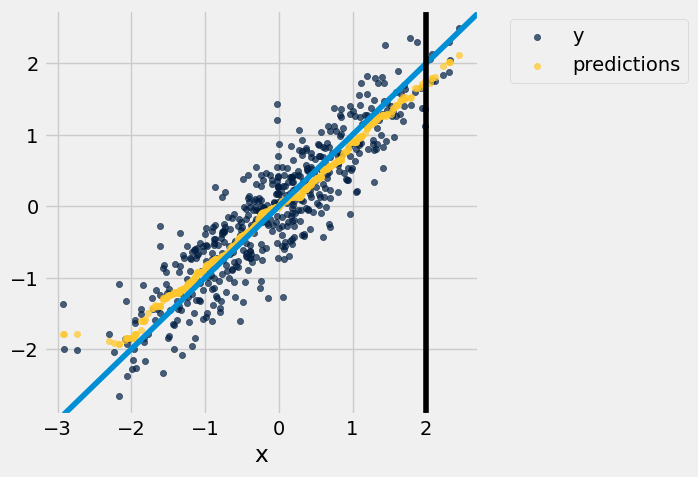

In [184]:
example.scatter('x')
draw_line(slope=1)
draw_vline(2)

## Now let's do this with the family data
- load the data
- compute the parent average
- convert to SU
- compute the nn predictions
- plot them
- compute the correlation
- add a line with slope=r

In [103]:
families = Table.read_table('data/family_heights.csv')
parent_avgs = (families.column('father') + families.column('mother'))/2
heights = Table().with_columns('Parent Average', parent_avgs, 'Child', families.column('child'))

In [152]:
heights['prediction']= make_nn_predictions(heights, 'Parent Average', 'Child', 2)

Parent Average,Child,prediction
72.75,73.2,70.3609
72.75,69.2,70.3609
72.75,69,70.3609
72.75,69,70.3609
71,73.5,69.2456
71,72.5,69.2456
71,65.5,69.2456
71,65.5,69.2456
69.5,71,67.9949
69.5,68,67.9949


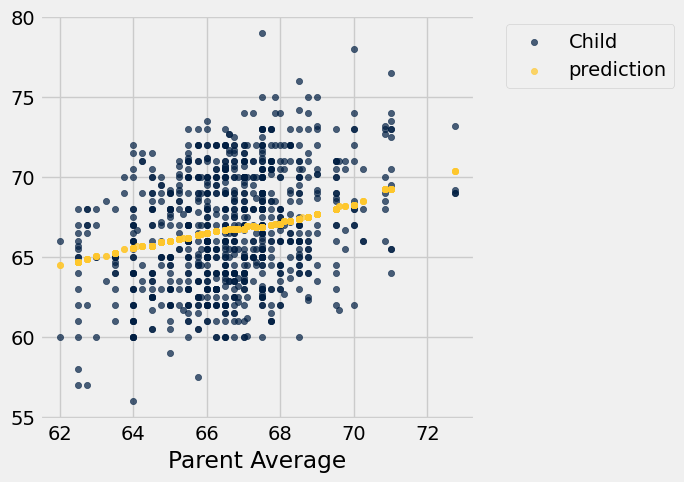

In [153]:
heights.scatter('Parent Average')

In [160]:
r = correlation(heights, "Parent Average", "Child")
r

0.32244267720033076

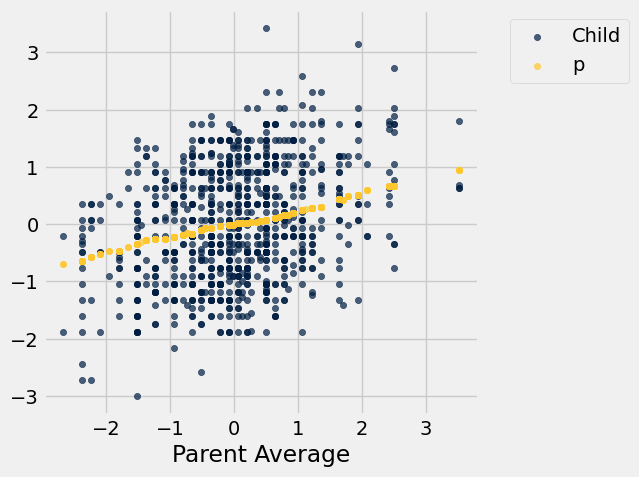

In [168]:
p = make_nn_predictions(su_heights, 'Parent Average', 'Child', 1)
su_heights = su_heights.with_column('p', p)
su_heights.scatter('Parent Average')

---

<center>Return to Slides</center>

---

## Defining the linear regression line

In standard units we developed a simple equation for the regression line:

\begin{align}
\text{SU}(y_\text{predicted}) = r * \text{SU}(x_\text{new})
\end{align}

where $r$ is the correlation coefficient and $\text{SU}$ is the standard units:

\begin{align}
\text{SU}(y_\text{predicted}) & = \frac{y_\text{predicted} - \text{Mean}(y)}{\text{Stdev}(y)} \\
\text{SU}(x_\text{new}) &= \frac{x_\text{new} - \text{Mean}(x)}{\text{Stdev}(x)}
\end{align}



Here we use $x_\text{new}$ to indicate a new $x$ value for which we want to make a prediction  $y_\text{predicted}$.

We would like to express this line in the original units of the data.  We can do that by substituting the definition of standard units:

\begin{align}
\frac{y_\text{predicted} - \text{Mean}(y)}{\text{Stdev}(y)} = r *  \frac{x_\text{new} - \text{Mean}(x)}{\text{Stdev}(x)}
\end{align}

While this equation does desribe a line it would look a little nicer in the form:

\begin{align}
y_\text{predicted} = \text{slope} * x_\text{new}  + \text{intercept}
\end{align}

Let's do some algebra to get that equation:
$$
\require{color}
\definecolor{comment}{RGB}{200,100,50}
\begin{align}
\frac{y_\text{predicted} - \text{Mean}(y)}{\text{Stdev}(y)} &= r *  \frac{x_\text{new} - \text{Mean}(x)}{\text{Stdev}(x)}\\
\frac{y_\text{predicted} - \text{Mean}(y)}{\text{Stdev}(y)} &= r * \frac{1}{\text{Stdev}(x)} x_\text{new} - r * \frac{1}{\text{Stdev}(x)}\text{Mean}(x)  & \color{comment} \text{Expanding the right side}\\
y_\text{predicted} - \text{Mean}(y) &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)} x_\text{new} - r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\text{Mean}(x) &  \color{comment} \text{Multiplying by $\text{Stdev}(y)$}\\
y_\text{predicted} &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)} x_\text{new} + \text{Mean}(y) - r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\text{Mean}(x) &  \color{comment} \text{Adding $\text{Mean}(y)$}\\
y_\text{predicted} &= \left(r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\right) x_\text{new} + \left(\text{Mean}(y) - r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\text{Mean}(x)\right) &  \color{comment} \text{Rearranging Terms}
\end{align}
$$

This means we can define the slope and intercept as:
\begin{align}
\text{slope} &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\\
\text{intercept} & = \text{Mean}(y) - \text{slope} * \text{Mean}(x)
\end{align}

## Implementing Linear Regression

Using the above equations implement the slope and intercept functions:

In [171]:
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

<details>
    
```python
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd
```

</details>

In [172]:
def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

<details>
    
```python
def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean
```

</details>

Testing it out

In [173]:
example = make_correlated_data(0.5)
slope(example, 'x', 'y')

0.49443556519979681

Computing the slope and intercept for the heights dataset:

In [174]:
heights_slope = slope(heights, 'Parent Average', 'Child')
heights_intercept = intercept(heights, 'Parent Average', 'Child')
[heights_slope, heights_intercept]

[0.66449526235258838, 22.461839955758798]

<details>
    
```python
heights_slope = slope(heights, 'Parent Average', 'Child')
heights_intercept = intercept(heights, 'Parent Average', 'Child')
[heights_slope, heights_intercept]
```
</details>

Adding the regression predictions:

In [175]:
prediction = heights_slope * heights.column('Parent Average') + heights_intercept
heights = heights.with_column('Regression Prediction', prediction)
heights

Parent Average,Child,prediction,Regression Prediction
72.75,73.2,70.3609,70.8039
72.75,69.2,70.3609,70.8039
72.75,69,70.3609,70.8039
72.75,69,70.3609,70.8039
71,73.5,69.2456,69.641
71,72.5,69.2456,69.641
71,65.5,69.2456,69.641
71,65.5,69.2456,69.641
69.5,71,67.9949,68.6443
69.5,68,67.9949,68.6443


<details>
    
```python
heights = heights.with_column(
    'Regression Prediction', 
    predicted_heights_slope*heights.column('Parent Average') + predicted_heights_intercept
)
heights
```
</details>

(55.0, 80.0)

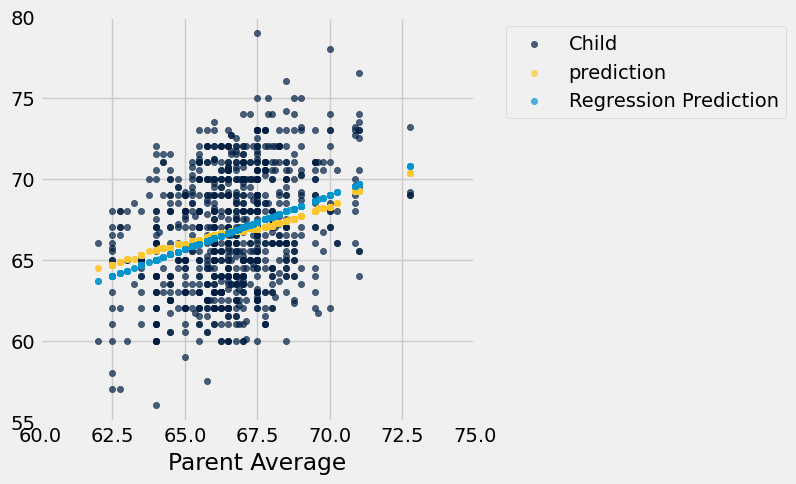

In [193]:
heights.scatter('Parent Average')
#draw_line(heights_intercept, heights_slope)
plots.xlim(60,75)
plots.ylim(55,80)

---

<center>Return to Slides</center>

---

## Discussion Question: Exam Score Prediction

In [ ]:
# X-axis: midterm scores
midterm_mean = 70
midterm_sd = 10

# Y-axis: final scores
final_mean = 50
final_sd = 12

# Correlation (relates X to Y values)
corr = 0.75

# X value
midterm_student = 90

In [ ]:
midterm_student_su = (midterm_student - midterm_mean) / midterm_sd
midterm_student_su

In [ ]:
final_student_su = midterm_student_su * corr
final_student_su

In [ ]:
final_student = final_student_su * final_sd + final_mean
final_student